## Perform Principal component analysis and perform clustering using first
## 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain
## optimum number of clusters and check whether we have obtained same number of clusters with the original data
## (class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# prompt: import data file to the google colab

from google.colab import files
uploaded = files.upload()

import pandas as pd
wine_df = pd.read_csv("wine.csv")


Saving wine.csv to wine.csv


In [3]:
wine_df = pd.read_csv("wine.csv")

In [4]:
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
wine_df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA()

In [10]:
pc = pca.fit_transform(wine_df)

In [11]:
pca.explained_variance_ratio_

array([9.98087625e-01, 1.73591851e-03, 9.58948998e-05, 5.13200714e-05,
       1.29365230e-05, 8.73476385e-06, 2.88762342e-06, 1.56228669e-06,
       1.14428924e-06, 8.69067273e-07, 4.64851997e-07, 3.51409235e-07,
       2.08896603e-07, 8.14215462e-08])

In [12]:
# Putting only first 5 columns
pc_df = pd.DataFrame(data = pc[:,:3] , columns= [f"PC_{x}"for x in range(0,3)])

In [13]:
pc_df

,PC_0,PC_1,PC_2
0,318.564055,21.490773,3.164613
1,303.098514,-5.366083,6.816992
2,438.062063,-6.537986,-1.066717
3,733.240711,0.193320,-0.938312
4,-11.569952,18.487255,-0.424917
...,...,...,...
173,-6.981858,-4.538116,-2.625187
174,3.129945,2.338236,-4.423240
175,88.456310,18.779644,-2.423127
176,93.454472,18.674180,-1.958775


## Agglomerative Clustering

### 1) On PCA data

In [14]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [15]:
# Scaling The data
from sklearn.preprocessing import StandardScaler

In [16]:
SS = StandardScaler()
for cols in pc_df.columns:
    pc_df[cols] = SS.fit_transform(pc_df[[cols]])

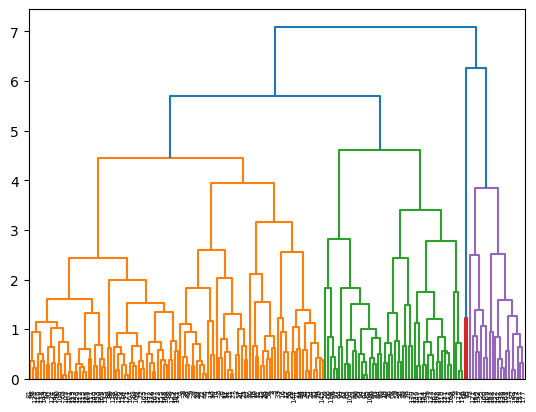

In [17]:
dendrogram = sch.dendrogram(sch.linkage(pc_df , method="complete"))

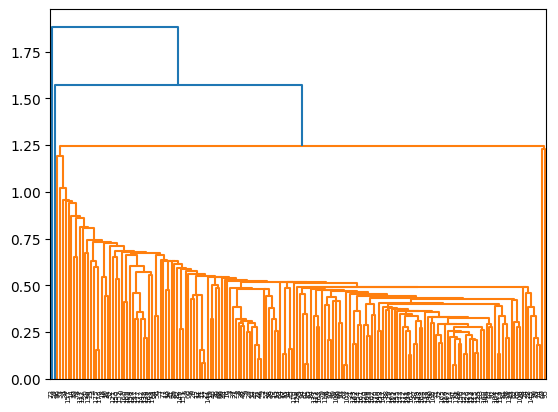

In [18]:
dendrogram = sch.dendrogram(sch.linkage(pc_df , method="single"))

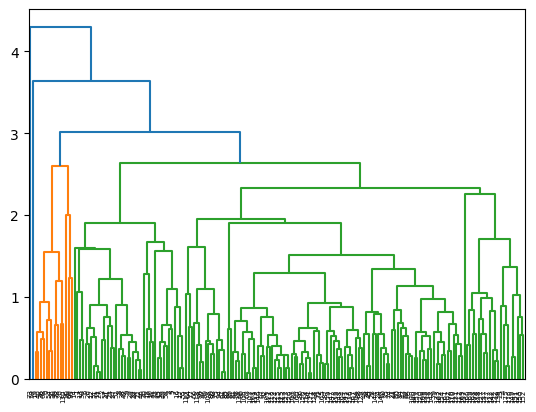

In [19]:
dendrogram = sch.dendrogram(sch.linkage(pc_df , method="average"))

#### We can see 3 Clusters Formed In complete linkage in aglomertive clustering

In [20]:
hc = AgglomerativeClustering(n_clusters=3 , linkage="complete" , affinity="euclidean")

In [21]:
y_hc = hc.fit_predict(pc_df)

In [22]:
pc_df["Agglo Clusters"] = y_hc

### 2) On Complete Data

In [23]:
SS = StandardScaler()
for cols in wine_df.columns:
    wine_df[cols] = SS.fit_transform(wine_df[[cols]])

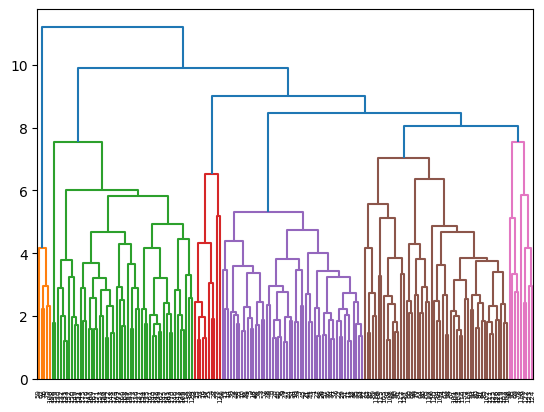

In [24]:
dendrogram = sch.dendrogram(sch.linkage(wine_df , method="complete"))

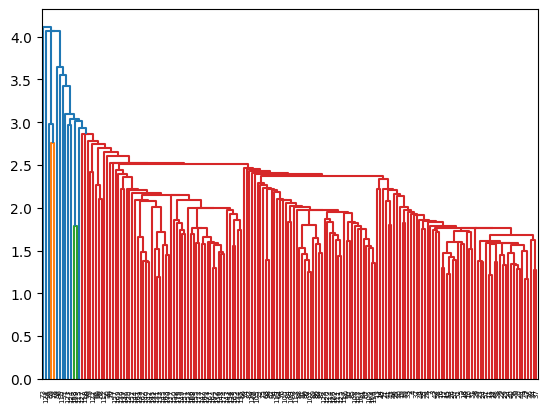

In [25]:
dendrogram = sch.dendrogram(sch.linkage(wine_df , method="single"))

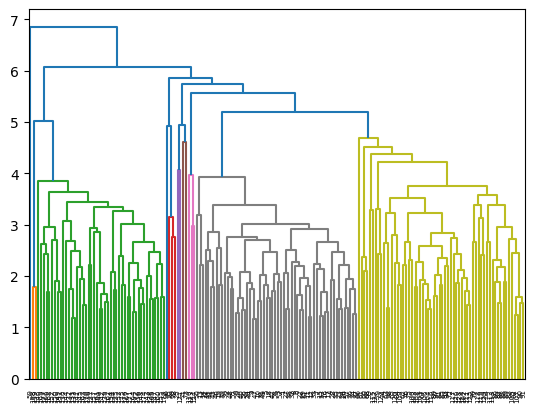

In [26]:
dendrogram = sch.dendrogram(sch.linkage(wine_df , method="average"))

#### We can see 5 Clusters Formed In complete linkage in aglomertive clustering

In [27]:
hc = AgglomerativeClustering(n_clusters=5 , linkage="complete" , affinity="euclidean")

In [28]:
y_hc = hc.fit_predict(wine_df)

In [29]:
wine_df["Agglo Clusters"] = y_hc

In [30]:
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Agglo Clusters
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,4
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,4
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,4
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,4
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1


## K-Means

### 1) On PCA Data

In [31]:
from sklearn.cluster import KMeans

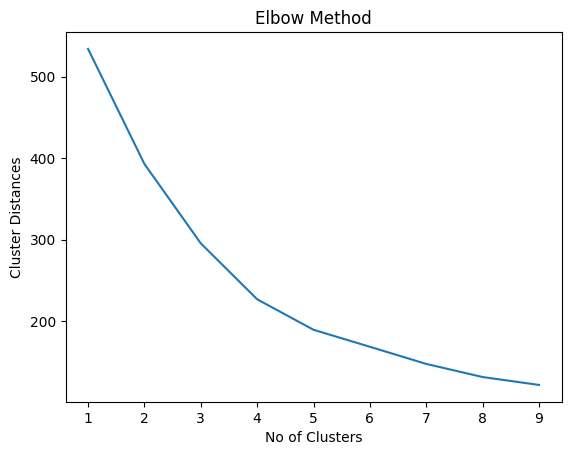

In [32]:
km_df = pc_df.drop("Agglo Clusters" , axis=1)
cluster_distance = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i , random_state=101)
    kmeans.fit(km_df)
    cluster_distance.append(kmeans.inertia_)
plt.plot(range(1,10) , cluster_distance)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("Cluster Distances");

### WE can see k=5 as optimal number

In [33]:
kmeans = KMeans(n_clusters=5 , random_state=101)

In [34]:
y_km = kmeans.fit_predict(km_df)

In [35]:
pc_df["K Means"] = y_km

In [36]:
pc_df.head()

,PC_0,PC_1,PC_2,Agglo Clusters,K Means
0,1.014285,1.640721,1.027946,0,4
1,0.965044,-0.409676,2.214331,0,0
2,1.394758,-0.499145,-0.346496,0,0
3,2.334585,0.014759,-0.304787,0,0
4,-0.036838,1.411416,-0.138024,0,4


### On complete data

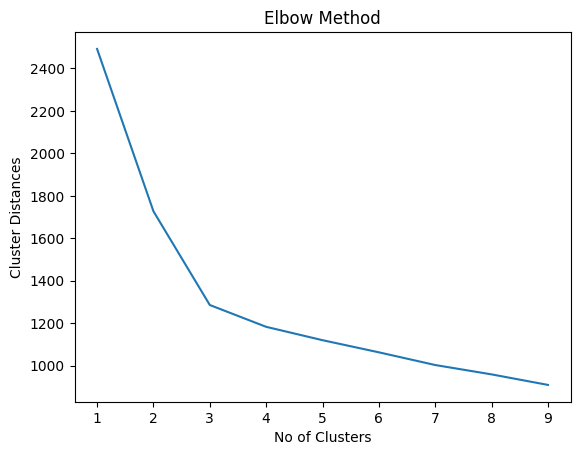

In [38]:
km_df = wine_df.drop("Agglo Clusters" , axis=1)
cluster_distance = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i , random_state=101)
    kmeans.fit(km_df)
    cluster_distance.append(kmeans.inertia_)
plt.plot(range(1,10) , cluster_distance)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("Cluster Distances");

### Here K=4 seems optimal

In [39]:
kmeans = KMeans(n_clusters=4 , random_state=101)

In [40]:
y_km = kmeans.fit_predict(km_df)

In [42]:
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Agglo Clusters
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,4
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,4
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,4
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,4
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
